In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt


In [153]:
# load dataset
dataframe = pandas.read_csv("data/records_fourth.csv", header=0)



In [154]:
dataframe.head()

,name,gh_version,pypi_version,status,diffoscope,error
0,inapppy,2.6,2.5.2,Success,├── file list inapppy setup.py,NA
1,energy-trading-api,0.0.34,0.0.34,Success,├── file list README.md energy_trading_api set...,NA
2,django-guid,Failed,Failed,Failed,Error,GH: No setup.py found
3,tiledb,Failed,Failed,Failed,Error,GH: No version found after checking __init__.py
4,pytest-sanic,1.9.1,1.9.1,Success,├── file list setup.py,NA


In [155]:
dataframe.describe()

,name,gh_version,pypi_version,status,diffoscope,error
count,1000,1000,1000,1000,999,1000
unique,972,199,199,2,173,6
top,abodepy,Failed,Failed,Failed,Error,NA
freq,3,696,696,712,712,288


In [156]:
dataframe['status'].value_counts()

Failed     712
Success    288
Name: status, dtype: int64

<AxesSubplot: >

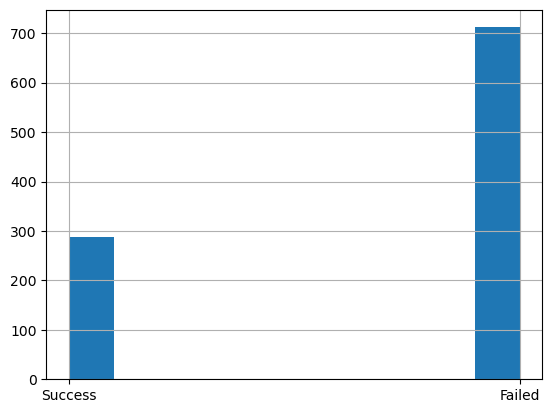

In [157]:
dataframe['status'].hist()

In [158]:
# Check which records have "status" of Success and check "diffoscope" column for ones that have only "├── file list"

dataframe.loc[dataframe['status'] == 'Success'].head(35)


,name,gh_version,pypi_version,status,diffoscope,error
0,inapppy,2.6,2.5.2,Success,├── file list inapppy setup.py,NA
1,energy-trading-api,0.0.34,0.0.34,Success,├── file list README.md energy_trading_api set...,NA
4,pytest-sanic,1.9.1,1.9.1,Success,├── file list setup.py,NA
6,google-search,1.1.1,1.1.1,Success,├── file list setup.cfg,NA
8,pandas-dedupe,1.5.0,1.5.0,Success,├── file list README.md,NA
14,ctutlz,..1,0.9.8,Success,├── file list ctutlz setup.py,NA
16,jsonseq,1.0.0,1.0.0,Success,├── file list,NA
19,django-rest-framework-mongoengine,3.4.1,3.4.1,Success,├── file list README.md rest_framework_mongoen...,NA
20,html-similarity,0.3.3,0.3.3,Success,├── file list,NA
21,markdownsuperscript,2.1.1440,2.1.1,Success,├── file list requirements setup.cfg,NA


In [162]:

dfr = dataframe.loc[dataframe['status'] == 'Success']
dfr = dfr.loc[dfr['diffoscope'] == '├── file list']
# len
print(len(dfr))
dfr.head()

# Graph Success packages. name vs gh_version (is a string) chart with the version at the side
for i in range(len(dfr)):
    print(dfr.iloc[i]['name'], dfr.iloc[i]['gh_version'])




52
jsonseq 1.0.0
html-similarity 0.3.3
tfcoreml 2.0
better-setuptools-git-version 1.0.5
django-docopt-command 1.1.0
telegraph 2.2.0
dataclassy 1.0.1
poolsense 0.1.0
performer-pytorch 1.1.4
graphyte .1
tensorci-client 0.0.14
mkdocs-exclude 1.0.2
pyaesni 0.16
cdifflib 1.2.6
pycontrol4 1.1.0
pycrypt 0.7.2
pyqrcode 1.2.1
mmh3cffi 0.2.1
mem-top 0.2.1
faadelays 0.0.7
r53-register 0.1.7
drf-access-policy 1.5.0
spamwatch 0.3.0
segtok 1.5.11
eniarbiter 1.3.2
pytest-reorder 0.1.1
enum34-custom 0.7.2
cpython 0.0.6
carly 0.13.0
pip-install-privates 0.6.3
pycorenlp 0.3.0
gluish 0.3.0
postnl-api 1.2.3
django-shortuuidfield 0.1.3
gelidum 0.6.0
humps 0.2.2
django-bmemcached 0.3.0
public 2020.12.3
query-string 2020.12.3
piccata 2.0.3
py-gfm 2.0.0
colorlover 0.3.0
bleach-whitelist 0.0.11
pyforce 1.9.1
bearychat-py 0.3.1
geoplot 0.5.1
nlprep 0.2.01
pyaztro 0.3
get-docker-secret 1.0.2
export-to-telegraph 0.0.148
django-migration-testcase 0.0.15
factotum 0.1.6


In [167]:

dfr = dataframe.loc[dataframe['status'] == 'Success']
dfr = dfr.loc[dfr['diffoscope'] != '├── file list']

# make diffoscope column a list by spliting after "├── file list"
dfr['diffoscope'] = dfr['diffoscope'].str.split('├── file list ')

# dfr = dfr.loc[len(list(dfr['diffoscope'])) > 1]

# dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: x[1:])
# dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: list(x)[0].split())

# dfr = dfr.loc[dfr['diffoscope'].apply(lambda x: len(x) < 2)]

# dfr['count'] = dfr['diffoscope'].apply(lambda x: len(x))


print(len(dfr))

# # Plot the number of packages that have a diffoscope output that is not just "├── file list" table
# fig, ax = plt.subplots()
#
# # hide axes
# fig.patch.set_visible(False)
# ax.axis('off')
# ax.axis('tight')
#
#
# ax.table(cellText=dfr['count'].values.reshape(-1, 1), colLabels=['Number of files'], rowLabels=dfr['name'].values.reshape(-1, 1), loc='center')
#
# fig.tight_layout()
#
# plt.show()


236


712
267
84
208
137


<BarContainer object of 4 artists>

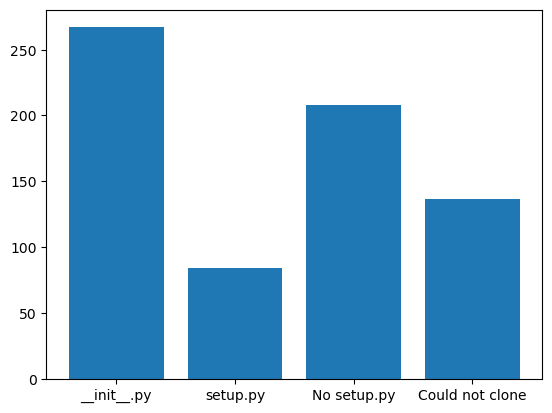

In [168]:
dfra = dataframe.loc[dataframe['status'] == 'Failed']

print(len(dfra))
# Check for errors involving __init__.py and setup.py not found
dfra = dfra['error'].apply(lambda x: str(x))


# dfr = dfra.loc[dfra['error'] in 'No version found after checking __init__.py']

dfra1 = dfra.loc[dfra.str.contains('No version found after checking __init__.py')]
dfra2 = dfra.loc[dfra.str.contains('No version found in setup.py')]
dfra4 = dfra.loc[dfra.str.contains('No setup.py found')]
dfra3 = dfra.loc[dfra.str.contains('Could not clone the repo')]
# dfra4 = dfra.loc[dfra == "NA"]

print(len(dfra1))
print(len(dfra2))
print(len(dfra3))
print(len(dfra4))


# Graph the length of dfra1, dfra2, dfra3, dfra4
plt.bar(['__init__.py', 'setup.py', 'No setup.py', 'Could not clone'], [len(dfra1), len(dfra2), len(dfra3), len(dfra4)])